## Imports

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage
import numpy as np
import cv2

## Create the image of a paraboloid with one axis scaled (like an oval paraboloid)


Plot em 3d


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


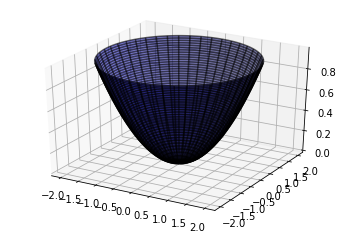


Plot em 2d


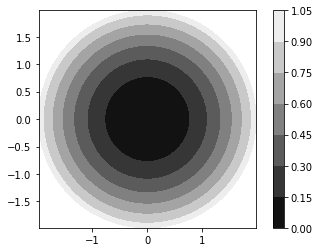

In [ ]:
theta = np.arange(0, 2*np.pi, 0.02)
z = np.arange(0 , 1 ,0.02)

theta, z_ = np.meshgrid(theta, z)

r = np.sqrt(4*z_)

x = r * np.cos(theta)
y = r * np.sin(theta)
z = z_

#plot em 3d
print("\nPlot em 3d")
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.plot_surface(x,y,z, color = 'blue', alpha = 0.5)
ax.plot_wireframe(x,y,z, color = 'black', alpha = 0.6)

plt.show()

#plot em 2d
print("\nPlot em 2d")
h = plt.contourf(x,y,z, cmap = 'gray')
plt.axis('scaled')
plt.colorbar()

plt.show()


## Create the image of a rotated sin using rotation of coordinates

In [ ]:
# Make data.
a = np.arange(-10, 10, 0.1)
b = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(a, b)
Z = np.sin(X)

Antes da rotação:


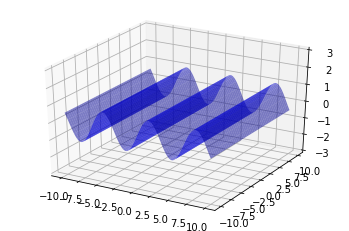


Após rotação:


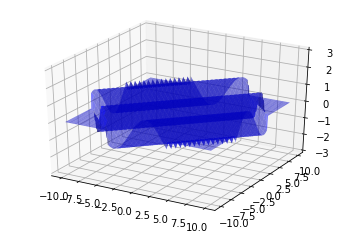


Vista superior em tons de cinza:


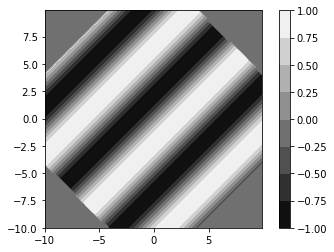

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
print("Antes da rotação:")

X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X)

ax.plot_surface(X, Y, Z, color = 'blue', alpha = 0.5)

ax.set_zlim(-3.01,3.01)

plt.show()

#############################################################

print("\nApós rotação:")
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

Z =  ndimage.rotate(Z,45, reshape=False)

ax.plot_surface(X, Y, Z, color = 'blue', alpha = 0.5)
ax.set_zlim(-3.01,3.01)

plt.show()

##############################################################
print("\nVista superior em tons de cinza:")
h = plt.contourf(X, Y, Z, cmap = 'gray')
plt.axis('scaled')
plt.colorbar()
plt.show()

Plot em 3d


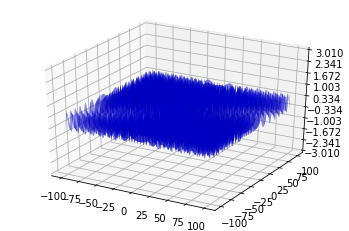


Plot em 2d


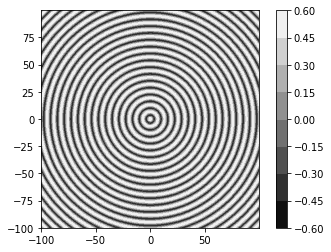

In [ ]:
a = np.arange(-100, 100, 0.1)
b = np.arange(-100, 100, 0.1)
X, Y = np.meshgrid(a, b)
Z = (np.sin(np.sqrt(X**2 + Y**2)+1))/2

print('Plot em 3d')
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X, Y, Z, color = 'blue', alpha = 0.5)

ax.set_zlim(-3.01,3.01)
ax.zaxis.set_major_locator(LinearLocator(10))
plt.show()

##############################################################

print('\nPlot em 2d')
h = plt.contourf(X, Y, Z, cmap = 'gray')
plt.axis('scaled')
plt.colorbar()
plt.show()

## Create the image of a gaussian

Plot em 3d


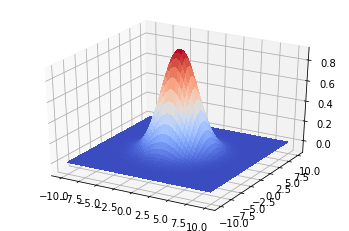


Plot em 2d


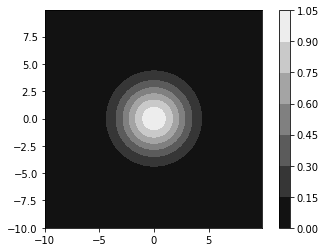

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-0.1*X**2-0.1*Y**2)

#plot em 3d
print("Plot em 3d")
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_zlim(-0.1, 0.9)
# ax.zaxis.set_major_locator(LinearLocator(10))

plt.show()

#plot em 2d
print("\nPlot em 2d")
h = plt.contourf(X, Y, Z, cmap = 'gray')
plt.axis('scaled')
plt.colorbar()

plt.show()

## Create a function that generates the image of a Gaussian optionally rotated by an angle theta and with mx, my, sx, sy as input arguments.

In [ ]:
def rotateGaussian(mx, my, sx, sy, theta):

    X = np.arange(-10, 10, 0.1)
    Y = np.arange(-10, 10, 0.1)
    X, Y = np.meshgrid(X, Y)
    
    theta = np.radians(theta)

    sx = sx**2; 
    sy = sy**2
    
    coef_1 = np.cos(theta)**2/(2*sx) + np.sin(theta)**2/(2*sy)
    coef_2 = np.sin(theta)**2/(2*sx) + np.cos(theta)**2/(2*sy)
    coef_3 = np.sin(2*theta)/(4*sx) - np.sin(2*theta)/(4*sy)

    Z = np.exp(-coef_1*(X-mx)**2 - coef_2*(Y-my)**2 - 2*coef_3*(X-mx)*(Y-my))

    print("Plot em 3d:")
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    ax.set_zlim(-0.1, 1)
    ax.plot_surface(X,Y,Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    plt.show()

    print("Plot em 2d:")
    plt.contourf(X, Y, Z, cmap = 'gray')
    plt.axis('scaled')
    plt.colorbar()

In [ ]:
#Setup
theta = 45 #dgr
mx = -5
my = -6.5
sx = 2
sy = 1

Plot em 3d:


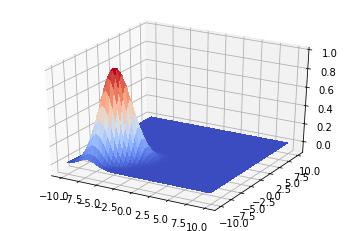

Plot em 2d:


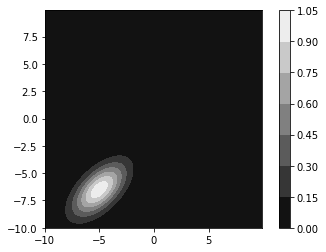

In [ ]:
rotateGaussian(mx,my,sx,sy,theta)